/tmp/ipykernel_21878/4118328695.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df,


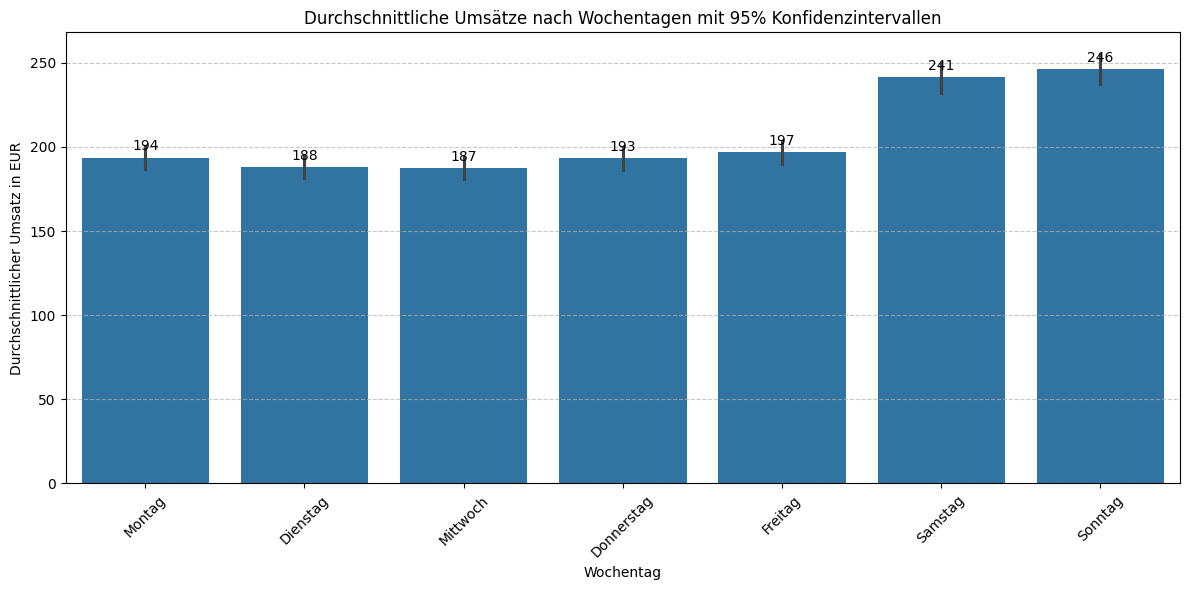

In [48]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Alte Plots schließen
plt.close('all')

# Daten einlesen
df = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Datum in datetime konvertieren und Wochentag extrahieren
df['Datum'] = pd.to_datetime(df['Datum'])
df['Wochentag'] = df['Datum'].dt.day_name()

# Wochentage auf Deutsch übersetzen
wochentage_mapping = {
    'Monday': 'Montag',
    'Tuesday': 'Dienstag',
    'Wednesday': 'Mittwoch',
    'Thursday': 'Donnerstag',
    'Friday': 'Freitag',
    'Saturday': 'Samstag',
    'Sunday': 'Sonntag'
}
df['Wochentag'] = df['Wochentag'].map(wochentage_mapping)

# Wochentage in richtige Reihenfolge bringen
wochentage_reihenfolge = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

# Diagramm mit seaborn erstellen (enthält automatisch Konfidenzintervalle)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, 
                x='Wochentag', 
                y='Umsatz', 
                order=wochentage_reihenfolge,
                ci=95)

# Durchschnittswerte über den Balken anzeigen
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

plt.title('Durchschnittliche Umsätze nach Wochentagen mit 95% Konfidenzintervallen')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz in EUR')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout optimieren
plt.tight_layout()

# Plot anzeigen
plt.show()
